<a href="https://colab.research.google.com/github/PedroJoas/ProjetoDS_votacao/blob/main/Vota%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

##Web Scrapping

Primeiramente, vamos pegar a url do site onde está a classificação ideológica de cada partido.

Em seguida, solicitamos as informações da fonte do site

e por fim pegamos o código html da pagina

In [ ]:
url = 'https://radames.manosso.nom.br/palavras/politica/qual-e-a-ideologia-de-cada-partido-brasileiro/'

page = get(url)

soup = BeautifulSoup(page.text, 'html.parser')

As informações que queremos está dentro de uma table, então vamos usar o método **.find** do BeautifulSoup e passamos o elemento que queremos, que no caso é uma table.

Como só tem somente uma table em toda a página, podemos fazer dessa maneira mesmo





In [ ]:
table = soup.find('table')

o método **.read_html** lê uma string, então convertemos a table em string e vai voltar um array, por isso colocamos o [0], para pegar somente o primeiro valor do array, que no caso, é o código da table.

o parâmetro **skiprows** serve para pular a primeira linha, pois quando lemos a table, o cabeçalho vai pra primeira linha, então somente pulamos ela e em seguida colocamos os nomes das colunas

In [ ]:
df_partidos = pd.read_html(str(table), skiprows=[0])[0]
df_partidos.columns = ['Partido',	'Campo ideológico',	'Posição']
df_partidos.head()

,Partido,Campo ideológico,Posição
0,AVANTE – AVANTE,Trabalhista,Centro esquerda
1,DC – DEMOCRATA CRISTÃO,Cristão,Direita
2,DEM – DEMOCRATAS,Conservador,Centro direita
3,MDB – MOVIMENTO DEMOCRÁTICO BRASILEIRO,Conservador,Centro direita
4,NOVO – PARTIDO NOVO,Liberal,Direita


Como podemos ver, está "DC - DEMOCRATA CRISTÃO", porém queremos somente a primeira parte, ou seja, a sigla do partido.

Então vamos percorrer toda a coluna "Partido" e separar por hífen usando o método `.split`, ele vai retornar uma lista ['DC', 'DEMOCRATA CRISTÃO'], como eu queremos somente a sigla, pegamos o primeiro valor, ou seja, o item de index 0. E usamos o método `strip` para remover os espaços em branco no inicio e no fim da string. Por fim acrescentamos em uma lista

In [ ]:
partidos = []
for p in df_partidos.Partido:
  partidos.append(p.split('–')[0].strip())

Com a lista feita e organizada, substituimos os valores que estavam na coluna "Partido" e colocamos os valores da lista organizada





In [ ]:
df_partidos['Partido'] = partidos

In [ ]:
df_partidos.head()

,Partido,Campo ideológico,Posição
0,AVANTE,Trabalhista,Centro esquerda
1,DC,Cristão,Direita
2,DEM,Conservador,Centro direita
3,MDB,Conservador,Centro direita
4,NOVO,Liberal,Direita


##Analise 

Vamos ler um arquivo excel da votação

In [ ]:
df_votacao = pd.read_excel('/content/votacao.xlsx')
df_votacao.head()

,Deputado,Partido,UF,Voto
0,Alan Rick,DEM,AC,Sim
1,Dra.Vanda Milani,SD,AC,Sim
2,Flaviano Melo,MDB,AC,Sim
3,Jessica Sales,MDB,AC,Sim
4,Jesus Sérgio,PDT,AC,Sim


Vamos juntar os dois dataframes feitos usando o método `.merge` do dataframe.

passamos o dataframe que vamos juntar, que no caso é o df_partidos e o parâmetro **on** é nome da coluna que tem nos dois dataframes, vai servir para relacionar um com outro.

caso tenha dúvida [Acesse a documentaçao]('https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [ ]:
df_completo = df_votacao.merge(df_partidos, on='Partido')

In [ ]:
df_completo.head()

,Deputado,Partido,UF,Voto,Campo ideológico,Posição
0,Alan Rick,DEM,AC,Sim,Conservador,Centro direita
1,Arthur O. Maia,DEM,BA,Não,Conservador,Centro direita
2,Elmar Nascimento,DEM,BA,Sim,Conservador,Centro direita
3,Igor Kannário,DEM,BA,Sim,Conservador,Centro direita
4,Leur Lomanto Jr,DEM,BA,Não,Conservador,Centro direita


Agora vamos fazer um função para plotar um countplot.

Pedimos a coluna, um titulo e a label do eixo X.

Para isso, usaremos o método ```.countplot``` da biblioteca seaborn. Passamos também a estilização do título e as labels dos eixos.

In [ ]:
def count_plot(column,title,xlabel):
  plt.figure(figsize=(12,8))
  sns.countplot(x=column, data=df_completo, palette='flare', hue='Voto')

  font1 = {'family':'serif','color':'black','size':20}
  font2 = {'family':'serif','color':'purple','size':15}

  plt.title(title, fontdict=font1)
  plt.ylabel('Quantidade', fontdict=font2)
  plt.xlabel(xlabel, fontdict=font2)

Plotamos o gráfico passando o que foi pedido, para isso usaremos o método




Analisando esse gráfico, podemos ver que a maioria dos votos "sim", foram os partidos de centro direita

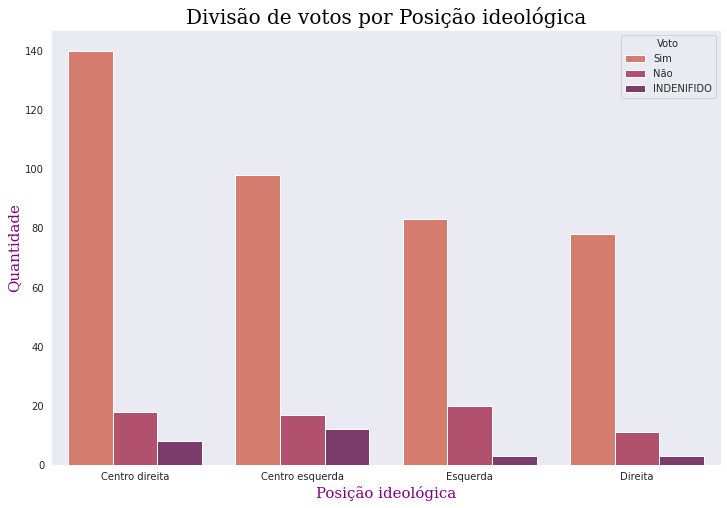

In [ ]:
count_plot(column='Posição',title='Divisão de votos por Posição ideológica',xlabel='Posição ideológica')

Agora analisando por campo ideológico, os partidos conservadores foram os que mais foram a favor

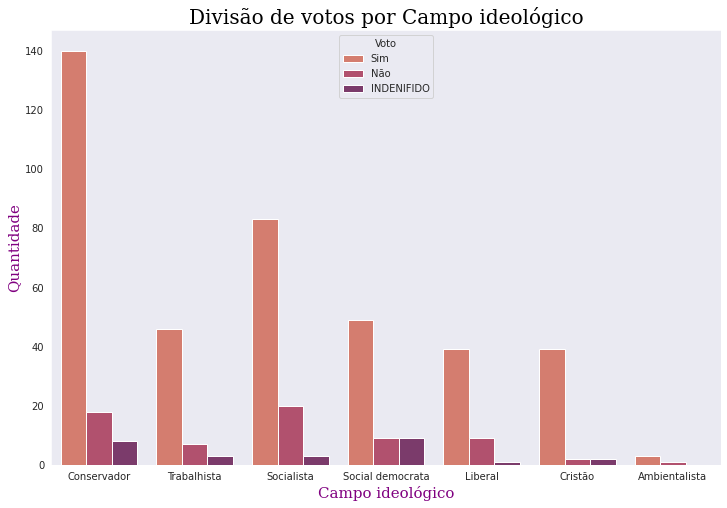

In [ ]:
count_plot(column='Campo ideológico',title='Divisão de votos por Campo ideológico',xlabel='Campo ideológico')

Agora vamos filtrar todo o dataframe onde a coluna **Voto** é igual a "Sim".

Vamos usar isso para pegar uma proporção de votos de cada estado

In [ ]:
votos_sim = df_completo[df_completo['Voto'] == 'Sim']
votos_sim.head()

,Deputado,Partido,UF,Voto,Campo ideológico,Posição
0,Alan Rick,DEM,AC,Sim,Conservador,Centro direita
2,Elmar Nascimento,DEM,BA,Sim,Conservador,Centro direita
3,Igor Kannário,DEM,BA,Sim,Conservador,Centro direita
5,Paulo Azi,DEM,BA,Sim,Conservador,Centro direita
6,Aníbal Gomes,DEM,CE,Sim,Conservador,Centro direita


Vamos contar quantas vezes aparece cada estado no dataframe filtrado de votos sim.

Também vamos contar quantas vezes aparece cada estado no dataframe completo.

Quando usamos o método ```.value_counts```, ele retorna um Pandas Series e seu index são valores que são contados, aqui por exemplo, serão os estados. 

Para poder comparar as duas Series certinho, vamos colocar o index em ordem alfabética usando o método ```.sort_index``` 

In [ ]:
quant_sim = votos_sim['UF'].value_counts().sort_index()
quant_total = df_completo['UF'].value_counts().sort_index()

Agora vamos dividir a quantidade de votos sim por a quantidade total de votos por estado.

Multiplicamos por 100 para ficar em valor percentual

In [ ]:
prop_votos = (quant_sim/quant_total)*100

Criamos um dataframe com cada estado e sua proporção

In [ ]:
df_prop = pd.DataFrame()

df_prop['UF'] = sorted(df_completo['UF'].unique())
df_prop['Proporcao'] = prop_votos.values

df_prop.head()

,UF,Proporcao
0,AC,100.000000
1,AL,100.000000
2,AM,87.500000
3,AP,87.500000
4,BA,76.315789


##Criação do mapa

Vamos criar um mapa usando a biblioteca folium

Pode acessar a [documentação por aqui](http://python-visualization.github.io/folium/index.html#)

In [ ]:
import folium

Primeiro vamos pegar o arquivo json da área marcada do brasil.

Em seguida instanciamos o Map passando a latitude e longitude de onde vai abrir o mapa, aí está marcado quase no meio do brasil e também passamos o zoom inicial

In [ ]:
geo = 'https://raw.githubusercontent.com/luizpedone/municipal-brazilian-geodata/master/data/Brasil.json'
map = folium.Map(location=[-10.337539, -54.993418],zoom_start=3.5)

Vamos fazer um Choropleth Map([Documentação](http://python-visualization.github.io/folium/quickstart.html#Choropleth-maps)).

Passamos o geojson do brasil;

O dataframe com os valores;

As colunas que serão usadas do dataframe;

Onde se localiza o valor para refenciar no geojson, ele se referencia pela primeira coluna passada  no parâmetro **columns**, ou seja, a coluna UF;

A paleta de cores;

Nome da legenda.

In [ ]:
folium.Choropleth(
    geo_data=geo,
    data=df_prop,
    columns=["UF", "Proporcao"],
    key_on="feature.properties.UF",
    fill_color="YlGn",
    legend_name="Proporção de votos(%)", 
).add_to(map)
folium.LayerControl().add_to(map)
map

Por fim salvamos todos os arquivos feitos

In [ ]:
map.save("index.html")

df_completo.to_csv('df_completo.csv')
df_partidos.to_csv('df_partidos.csv')
votos_sim.to_csv('df_votos_sim.csv')
df_prop.to_csv('df_prop.csv')